In [1]:

# Basic setup for AgroPest-12 EDA in Colab

import os
import sys
import shutil
import pathlib

work_dir = "/content/agropest12_work"
data_dir = os.path.join(work_dir, "data")

os.makedirs(data_dir, exist_ok=True)
print("Working directory:", work_dir)


from google.colab import files
uploaded = files.upload()  # upload kaggle.json

!pip -q install kaggle
import json


kaggle_dir = pathlib.Path("/root/.kaggle")
kaggle_dir.mkdir(parents=True, exist_ok=True)
shutil.move("kaggle.json", kaggle_dir / "kaggle.json")

# set correct permissions (required by Kaggle)
os.chmod(kaggle_dir / "kaggle.json", 0o600)
print("Kaggle API configured")

Working directory: /content/agropest12_work


Saving kaggle.json to kaggle.json
Kaggle API configured


Dataset URL: https://www.kaggle.com/datasets/rupankarmajumdar/crop-pests-dataset
License(s): MIT
Unzipped into: /content/agropest12_work/data
crop-pests-dataset.zip
data.yaml
test
train
valid
Found split folders: ['train', 'valid', 'test']

=== TRAIN ===
classes: 2 | images: 23004
images                11502
labels                11502

=== VALID ===
classes: 2 | images: 2190
images                 1095
labels                 1095

=== TEST ===
classes: 2 | images: 1092
images                  546
labels                  546


Checking train images: 100%|██████████| 11502/11502 [00:00<00:00, 11607.76it/s]



Corrupted files: 0
=== TRAIN ===
images: 11502 labels: 11502
images without labels: 0
labels without images: 0
=== VALID ===
images: 1095 labels: 1095
images without labels: 0
labels without images: 0
=== TEST ===
images: 546 labels: 546
images without labels: 0
labels without images: 0
   class_id  count  percent
0         0   2231    14.60
1         1   1596    10.44
2        10   1167     7.64
3        11    975     6.38
4         2   1058     6.92
5         3   1740    11.39
6         4   1083     7.09
7         5   1182     7.73
8         6   1071     7.01
9         7   1062     6.95
10        8    918     6.01
11        9   1199     7.85

Total labels: 15282


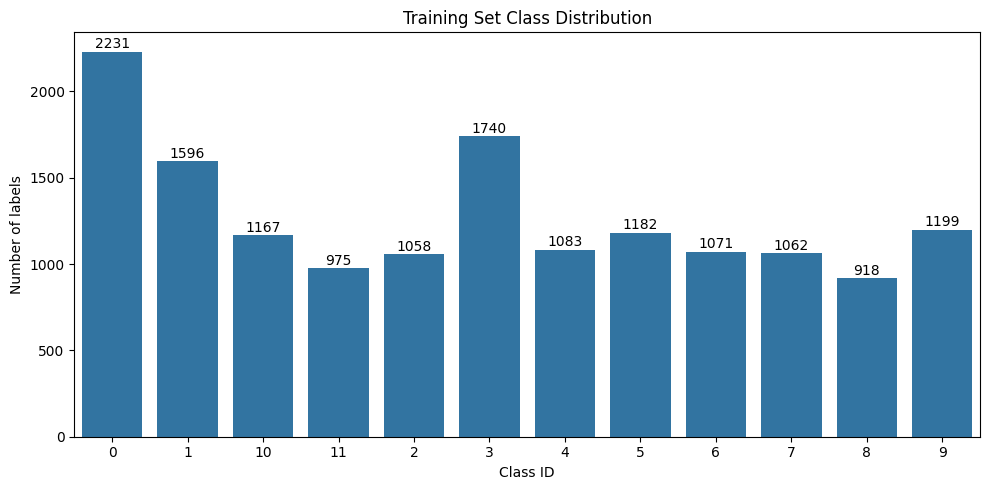

labels are spread reasonably across the 12 classes, so class imbalance does not look extreme.


Computing variance & size: 100%|██████████| 1500/1500 [00:16<00:00, 90.21it/s]


Mean variance: 3430.95 ± 1586.50
Mean size: 640.0 x 640.0
Min size: 640 x 640, Max size: 640 x 640


Hashing images: 100%|██████████| 11502/11502 [00:03<00:00, 3076.64it/s]



Potential duplicate pairs found: 3
[('moth-209-_jpg.rf.18a7c84dfa109007ae030ef2e0223d35.jpg', 'moth-209-_jpg.rf.1320459a1305ee220e6d777a6077f757.jpg'), ('slug-337-_jpg.rf.88af46bad441db96b48290da9a3ea55e.jpg', 'slug-337-_jpg.rf.25eaf799724ae2f204c70e66c90dff02.jpg'), ('grasshopper-42-_jpg.rf.c4f749688c0ce10449eea942d20e6d8d.jpg', 'grasshopper-42-_jpg.rf.b122cc8300c367cab0710858dec7dd44.jpg')]
Removed duplicate: moth-209-_jpg.rf.1320459a1305ee220e6d777a6077f757.jpg
Removed duplicate: slug-337-_jpg.rf.25eaf799724ae2f204c70e66c90dff02.jpg
Removed duplicate: grasshopper-42-_jpg.rf.b122cc8300c367cab0710858dec7dd44.jpg

Duplicates removed (if any).


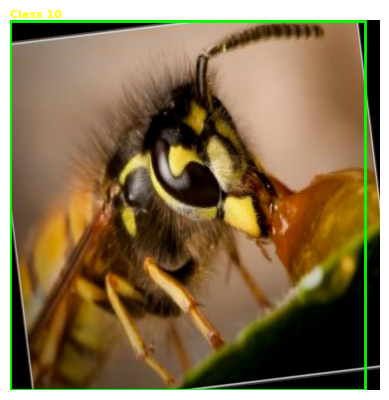

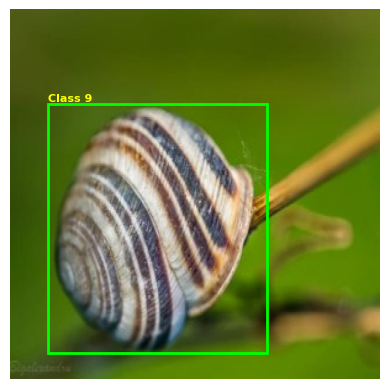

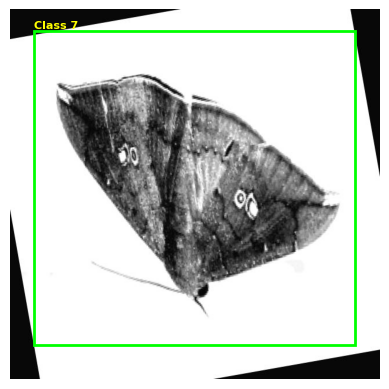

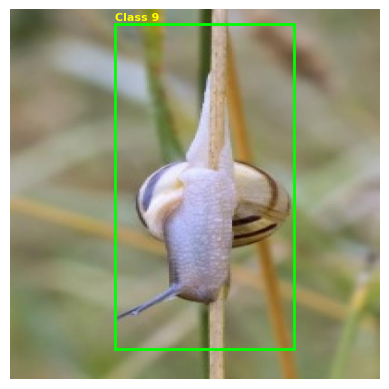

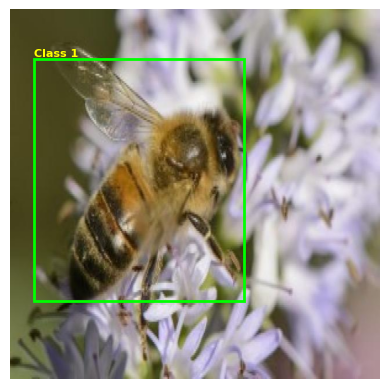

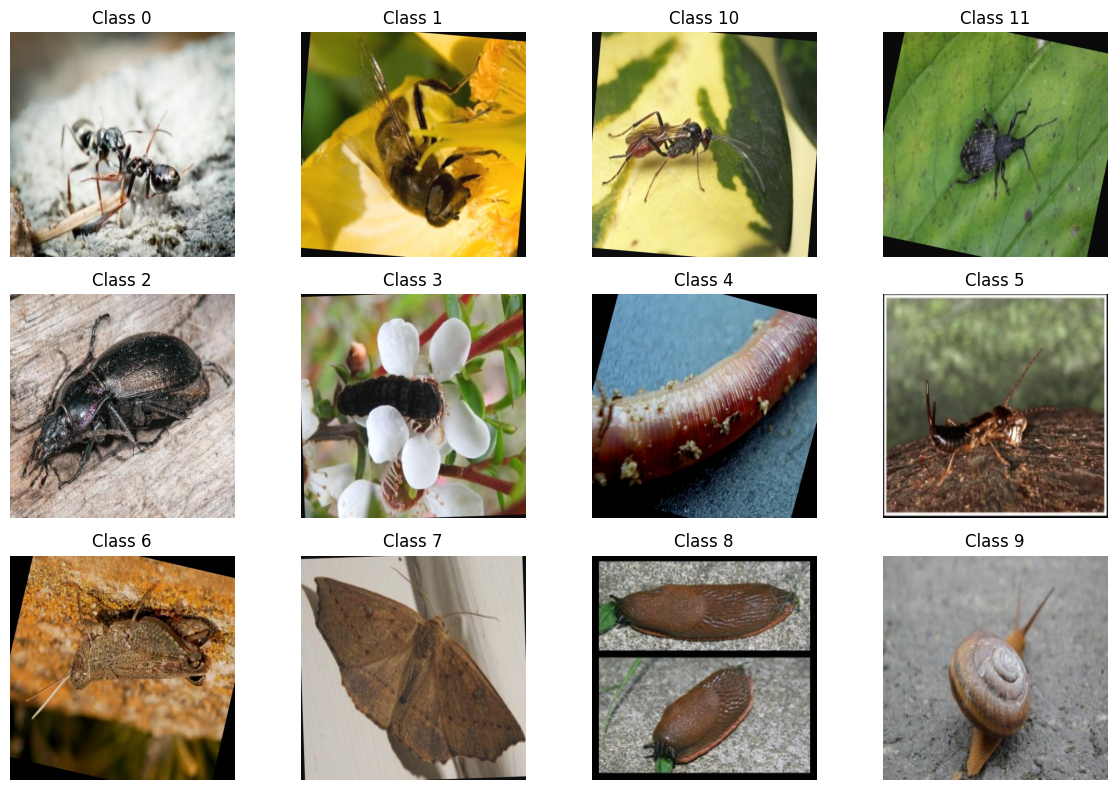

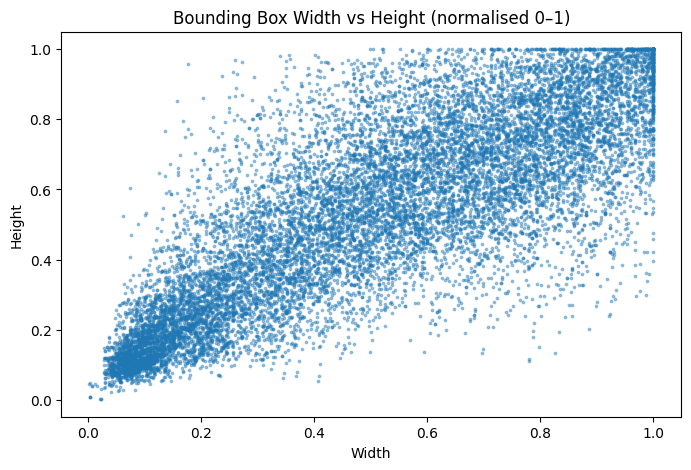

Average width: 0.514, height: 0.535
most boxes have similar width/height ratio, which is useful when picking anchor sizes.


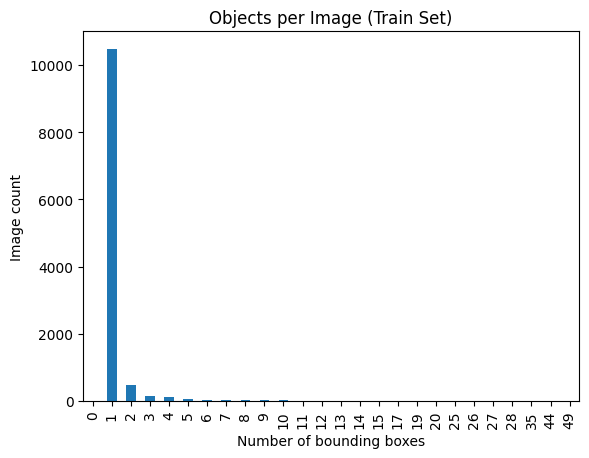

Most images only have one object, so this dataset is closer to single-object detection than crowded scenes.


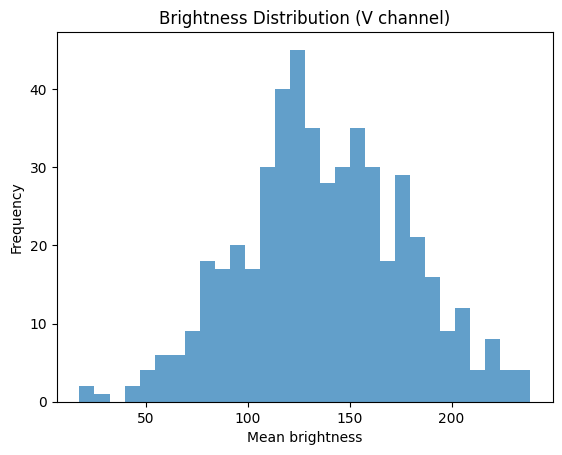

Mean brightness: 137.45 ± 40.53
There is a fair spread of brightness values, so training with brightness augmentation probably makes sense.
Mean brightness (gray): 121.68 ± 39.51
Mean contrast: 50.64 ± 12.71
Mean sharpness: 155.9 ± 127.5


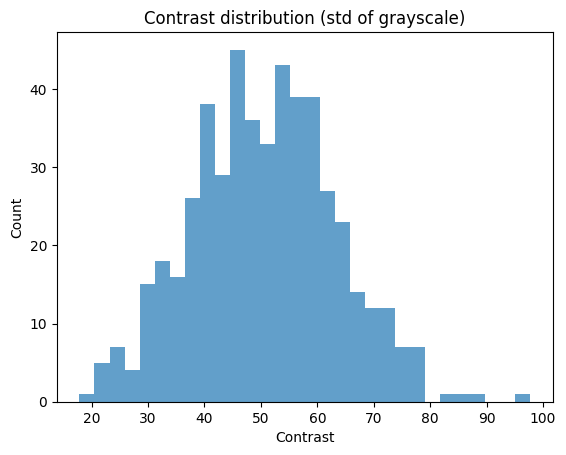

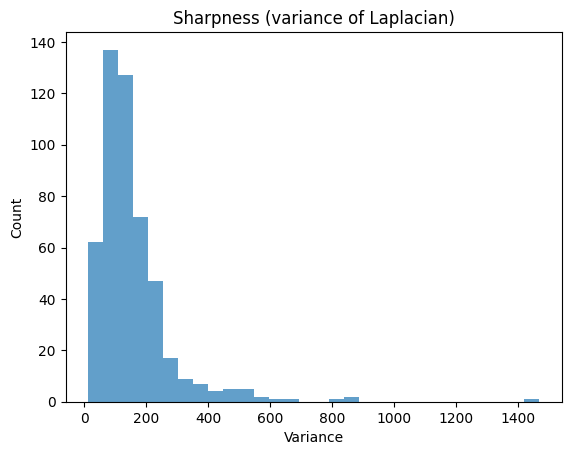

            Brightness  Contrast  Sharpness   Red  Green  Blue
Brightness        1.00      0.23       0.09  0.94   0.98  0.83
Contrast          0.23      1.00       0.23  0.27   0.19  0.23
Sharpness         0.09      0.23       1.00  0.11   0.06  0.13
Red               0.94      0.27       0.11  1.00   0.86  0.74
Green             0.98      0.19       0.06  0.86   1.00  0.76
Blue              0.83      0.23       0.13  0.74   0.76  1.00


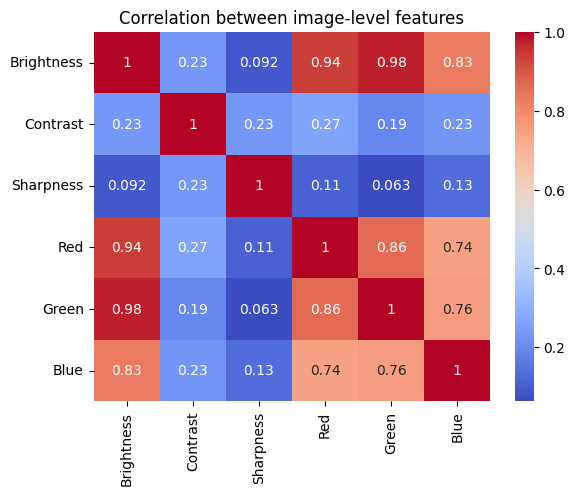

As expected, RGB means correlate strongly with brightness; sharpness behaves a bit more independently.


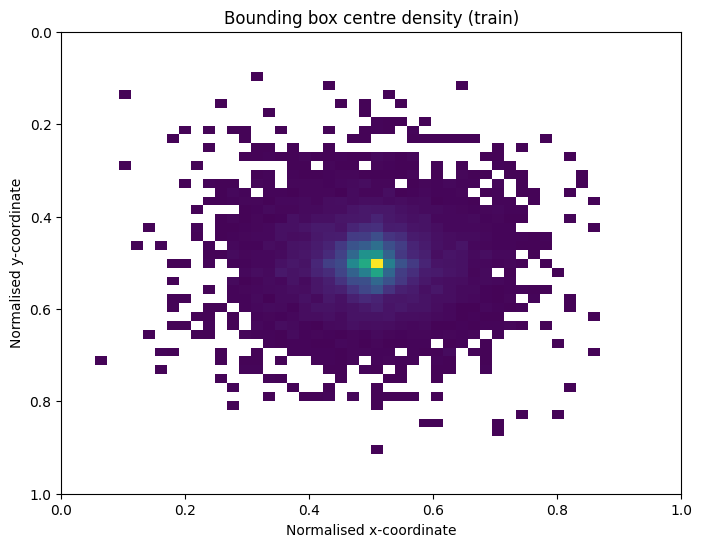

This shows where objects usually appear in the image. If centres cluster in one region, that hints at positional bias.


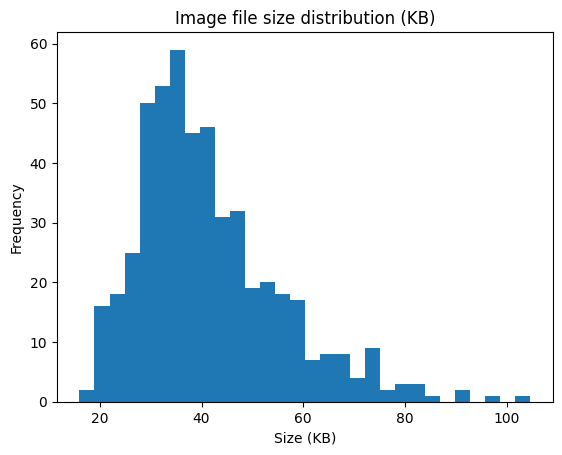

Mean file size: 41.4 KB ± 14.1


,Feature,Mean,Std,Min,Max,Comment
0,Brightness,121.679545,39.550948,13.581592,235.515913,Overall lighting level in the image.
1,Contrast,50.635397,12.719172,17.848881,97.741768,Difference between dark and bright areas.
2,Sharpness,155.895228,127.611268,12.199294,1468.620505,How in-focus the image is.
3,Red,126.760412,43.361691,11.035850,238.649263,Average intensity of the Red channel.
4,Green,124.422402,39.656602,13.381682,234.968113,Average intensity of the Green channel.
5,Blue,94.216612,48.682303,1.441968,234.936941,Average intensity of the Blue channel.


Saving outputs to: /content/eda_outputs
Wrote: /content/eda_outputs/eda_summary.json


In [ ]:


# Download AgroPest-12
!kaggle datasets download -d rupankarmajumdar/crop-pests-dataset -p {data_dir} -q

# Unzip
import zipfile
import glob

zip_files = glob.glob(os.path.join(data_dir, "*.zip"))
if len(zip_files) == 0:
    raise FileNotFoundError("No zip files found in data_dir")
zip_path = zip_files[0]

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(data_dir)
print("Unzipped into:", data_dir)

#chekc the structure
for item in sorted(os.listdir(data_dir)):
    print(item)

from collections import defaultdict

splits = ["train", "valid", "test"]
for split_name in splits:
    split_path = os.path.join(data_dir, split_name)
    assert os.path.isdir(split_path), f"Missing split folder: {split_name}"

print("Found split folders:", splits)

def count_images_per_class(split_dir):
    class_counts = {}
    for class_name in sorted(os.listdir(split_dir)):
        class_path = os.path.join(split_dir, class_name)
        if os.path.isdir(class_path):
            num_files = 0
            for entry in os.scandir(class_path):
                if entry.is_file():
                    num_files += 1
            class_counts[class_name] = num_files
    return class_counts

for split_name in splits:
    split_path = os.path.join(data_dir, split_name)
    class_counts = count_images_per_class(split_path)
    total_images = sum(class_counts.values())
    print(f"\n {split_name.upper()}")
    print("classes:", len(class_counts), "| images:", total_images)
    for class_name, num in class_counts.items():
        print(f"{class_name:20s} {num:6d}")

from PIL import Image
from tqdm import tqdm

corrupt_files = []

train_images_dir = os.path.join(data_dir, "train", "images")

for filename in tqdm(os.listdir(train_images_dir), desc="Checking train images"):
    img_path = os.path.join(train_images_dir, filename)
    try:
        Image.open(img_path).verify()
    except Exception:
        corrupt_files.append(img_path)

print(f"\nCorrupted files: {len(corrupt_files)}")
if corrupt_files:
    print(corrupt_files[:10])


def check_image_label_pairs(split_name):
    img_dir = os.path.join(data_dir, split_name, "images")
    label_dir = os.path.join(data_dir, split_name, "labels")

    image_stems = set()
    for p in glob.glob(os.path.join(img_dir, "*")):
        base = os.path.basename(p)
        stem, _ = os.path.splitext(base)
        image_stems.add(stem)

    label_stems = set()
    for p in glob.glob(os.path.join(label_dir, "*")):
        base = os.path.basename(p)
        stem, _ = os.path.splitext(base)
        label_stems.add(stem)

    missing_labels = sorted(list(image_stems - label_stems))
    missing_images = sorted(list(label_stems - image_stems))

    print(f"{split_name.upper()}")
    print("images:", len(image_stems), "labels:", len(label_stems))
    print("images without labels:", len(missing_labels))
    print("labels without images:", len(missing_images))

    return missing_labels, missing_images

missing_pairs = {}
for split_name in ["train", "valid", "test"]:
    missing_pairs[split_name] = check_image_label_pairs(split_name)

import pandas as pd
from collections import Counter

train_label_files = glob.glob(os.path.join(data_dir, "train", "labels", "*.txt"))

class_counter = Counter()
for label_path in train_label_files:
    with open(label_path, "r") as fh:
        for line in fh:
            parts = line.strip().split()
            if len(parts) == 0:
                continue
            class_id = parts[0]
            class_counter[class_id] += 1

df = pd.DataFrame(sorted(class_counter.items()), columns=["class_id", "count"])
df["percent"] = (df["count"] / df["count"].sum() * 100).round(2)
print(df)
print("\nTotal labels:", df["count"].sum())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="class_id", y="count")
plt.title("Training Set Class Distribution")
plt.xlabel("Class ID")
plt.ylabel("Number of labels")
for idx, row in df.iterrows():
    plt.text(idx, row["count"] + 20, str(row["count"]), ha="center")
plt.tight_layout()
plt.show()

print(
    "labels are spread reasonably across the 12 classes, "
    "so class imbalance does not look extreme."
)


import numpy as np
import random

train_images_dir = os.path.join(data_dir, "train", "images")
all_train_images = os.listdir(train_images_dir)

# cant sample more than we actually have
sample_size = min(1500, len(all_train_images))
sample_image_names = random.sample(all_train_images, sample_size)

pixel_variances = []
image_sizes = []

for filename in tqdm(sample_image_names, desc="Computing variance & size"):
    img_path = os.path.join(train_images_dir, filename)
    img = Image.open(img_path).convert("RGB")
    arr = np.array(img)
    pixel_variances.append(np.var(arr))
    image_sizes.append(arr.shape[:2])  # (H, W)

var_mean = float(np.mean(pixel_variances))
var_std = float(np.std(pixel_variances))
heights, widths = zip(*image_sizes)

print(f"Mean variance: {var_mean:.2f} ± {var_std:.2f}")
print(f"Mean size: {np.mean(heights):.1f} x {np.mean(widths):.1f}")
print(
    f"Min size: {np.min(heights)} x {np.min(widths)}, "
    f"Max size: {np.max(heights)} x {np.max(widths)}"
)


import hashlib

def get_image_hash(path):
    with open(path, "rb") as f:
        data = f.read()
    return hashlib.md5(data).hexdigest()

image_hashes = {}
duplicate_pairs = []

for filename in tqdm(os.listdir(train_images_dir), desc="Hashing images"):
    img_path = os.path.join(train_images_dir, filename)
    hval = get_image_hash(img_path)
    if hval in image_hashes:
        duplicate_pairs.append((filename, image_hashes[hval]))
    else:
        image_hashes[hval] = filename

print(f"\nPotential duplicate pairs found: {len(duplicate_pairs)}")
if duplicate_pairs:
    print(duplicate_pairs[:10])

for f1, f2 in duplicate_pairs:
    dup_path = os.path.join(train_images_dir, f2)
    if os.path.exists(dup_path):
        os.remove(dup_path)
        print("Removed duplicate:", f2)

print("\nDuplicates removed (if any).")


import matplotlib.patches as patches

train_label_dir = os.path.join(data_dir, "train", "labels")

def show_random_images_with_boxes(num_images=5):
    chosen_images = random.sample(os.listdir(train_images_dir), num_images)
    for img_name in chosen_images:
        img_path = os.path.join(train_images_dir, img_name)
        label_name = img_name.replace(".jpg", ".txt")
        label_path = os.path.join(train_label_dir, label_name)

        img = Image.open(img_path).convert("RGB")
        W, H = img.size

        fig, ax = plt.subplots(1)
        ax.imshow(img)

        if os.path.exists(label_path):
            with open(label_path, "r") as fh:
                for line in fh:
                    parts = line.strip().split()
                    if len(parts) != 5:
                        continue
                    class_id = int(float(parts[0]))
                    x_center = float(parts[1]) * W
                    y_center = float(parts[2]) * H
                    box_width = float(parts[3]) * W
                    box_height = float(parts[4]) * H

                    x_min = x_center - box_width / 2.0
                    y_min = y_center - box_height / 2.0

                    rect = patches.Rectangle(
                        (x_min, y_min),
                        box_width,
                        box_height,
                        linewidth=2,
                        edgecolor="lime",
                        facecolor="none",
                    )
                    ax.add_patch(rect)
                    ax.text(
                        x_min,
                        y_min - 5,
                        f"Class {class_id}",
                        color="yellow",
                        fontsize=8,
                        weight="bold",
                    )
        ax.axis("off")
        plt.show()

show_random_images_with_boxes()


label_files = os.listdir(train_label_dir)
class_example_file = {}

for label_file in label_files:
    label_path = os.path.join(train_label_dir, label_file)
    with open(label_path, "r") as fh:
        first_line = fh.readline().strip()
    if not first_line:
        continue
    class_id = first_line.split()[0]
    if class_id not in class_example_file:
        class_example_file[class_id] = label_file
    if len(class_example_file) == 12:
        break

fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for ax, (class_id, label_file) in zip(axes.flat, sorted(class_example_file.items())):
    img_name = label_file.replace(".txt", ".jpg")
    img_path = os.path.join(train_images_dir, img_name)
    ax.imshow(Image.open(img_path))
    ax.set_title(f"Class {class_id}")
    ax.axis("off")
plt.tight_layout()
plt.show()


box_widths = []
box_heights = []

for label_path in glob.glob(os.path.join(train_label_dir, "*.txt")):
    with open(label_path, "r") as fh:
        for line in fh:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            w = float(parts[3])
            h = float(parts[4])
            box_widths.append(w)
            box_heights.append(h)

box_widths = np.array(box_widths)
box_heights = np.array(box_heights)

plt.figure(figsize=(8, 5))
plt.scatter(box_widths, box_heights, s=3, alpha=0.4)
plt.title("Bounding Box Width vs Height (normalised 0–1)")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

print(
    f"Average width: {box_widths.mean():.3f}, "
    f"height: {box_heights.mean():.3f}"
)
print(
    "most boxes have similar width/height ratio, "
    "which is useful when picking anchor sizes."
)



object_counts = []

for label_path in glob.glob(os.path.join(train_label_dir, "*.txt")):
    with open(label_path, "r") as fh:
        lines = fh.readlines()
    object_counts.append(len(lines))

pd.Series(object_counts).value_counts().sort_index().plot(kind="bar")
plt.title("Objects per Image (Train Set)")
plt.xlabel("Number of bounding boxes")
plt.ylabel("Image count")
plt.show()

print(
    "Most images only have one object, so this dataset is closer to "
    "single-object detection than crowded scenes."
)


import cv2

random_train_images = random.sample(os.listdir(train_images_dir), min(500, len(os.listdir(train_images_dir))))
brightness_values = []

for filename in random_train_images:
    img_path = os.path.join(train_images_dir, filename)
    img = cv2.imread(img_path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    v_channel = hsv[:, :, 2]
    brightness_values.append(float(np.mean(v_channel)))

plt.hist(brightness_values, bins=30, alpha=0.7)
plt.title("Brightness Distribution (V channel)")
plt.xlabel("Mean brightness")
plt.ylabel("Frequency")
plt.show()

print(
    f"Mean brightness: {np.mean(brightness_values):.2f} ± "
    f"{np.std(brightness_values):.2f}"
)
print(
    "There is a fair spread of brightness values, so training with "
    "brightness augmentation probably makes sense."
)



feature_brightness = []
feature_contrast = []
feature_sharpness = []
mean_R = []
mean_G = []
mean_B = []

for filename in random_train_images:
    img_path = os.path.join(train_images_dir, filename)
    img_bgr = cv2.imread(img_path)

    # RGB channel means
    b_channel = img_bgr[:, :, 0]
    g_channel = img_bgr[:, :, 1]
    r_channel = img_bgr[:, :, 2]

    mean_B.append(float(np.mean(b_channel)))
    mean_G.append(float(np.mean(g_channel)))
    mean_R.append(float(np.mean(r_channel)))

    # grayscale for brightness/contrast
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    feature_brightness.append(float(np.mean(gray)))
    feature_contrast.append(float(np.std(gray)))

    # sharpness via variance of Laplacian
    lap_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    feature_sharpness.append(float(lap_var))

print(
    f"Mean brightness (gray): {np.mean(feature_brightness):.2f} "
    f"± {np.std(feature_brightness):.2f}"
)
print(
    f"Mean contrast: {np.mean(feature_contrast):.2f} "
    f"± {np.std(feature_contrast):.2f}"
)
print(
    f"Mean sharpness: {np.mean(feature_sharpness):.1f} "
    f"± {np.std(feature_sharpness):.1f}"
)

plt.hist(feature_contrast, bins=30, alpha=0.7)
plt.title("Contrast distribution (std of grayscale)")
plt.xlabel("Contrast")
plt.ylabel("Count")
plt.show()

plt.hist(feature_sharpness, bins=30, alpha=0.7)
plt.title("Sharpness (variance of Laplacian)")
plt.xlabel("Variance")
plt.ylabel("Count")
plt.show()

# Build feature DataFrame for correlation
df_feat = pd.DataFrame(
    {
        "Brightness": feature_brightness,
        "Contrast": feature_contrast,
        "Sharpness": feature_sharpness,
        "Red": mean_R,
        "Green": mean_G,
        "Blue": mean_B,
    }
)

corr = df_feat.corr()
print(corr.round(2))

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation between image-level features")
plt.show()

print(
    "As expected, RGB means correlate strongly with brightness; "
    "sharpness behaves a bit more independently."
)



bbox_centers_x = []
bbox_centers_y = []

for label_path in glob.glob(os.path.join(train_label_dir, "*.txt")):
    with open(label_path, "r") as fh:
        for line in fh:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            x = float(parts[1])
            y = float(parts[2])
            bbox_centers_x.append(x)
            bbox_centers_y.append(y)

plt.figure(figsize=(8, 6))
sns.histplot(
    x=bbox_centers_x,
    y=bbox_centers_y,
    bins=50,
    pthresh=0.1,
    cmap="viridis",
)
plt.title("Bounding box centre density (train)")
plt.xlabel("Normalised x-coordinate")
plt.ylabel("Normalised y-coordinate")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().invert_yaxis()  # YOLO y=0 is top
plt.show()

print(
    "This shows where objects usually appear in the image. "
    "If centres cluster in one region, that hints at positional bias."
)



file_sizes_kb = []

for filename in random_train_images:
    img_path = os.path.join(train_images_dir, filename)
    size_kb = os.path.getsize(img_path) / 1024.0
    file_sizes_kb.append(size_kb)

plt.hist(file_sizes_kb, bins=30)
plt.title("Image file size distribution (KB)")
plt.xlabel("Size (KB)")
plt.ylabel("Frequency")
plt.show()

print(
    f"Mean file size: {np.mean(file_sizes_kb):.1f} KB "
    f"± {np.std(file_sizes_kb):.1f}"
)



summary_data = {
    "Feature": [],
    "Mean": [],
    "Std": [],
    "Min": [],
    "Max": [],
    "Comment": [],
}

for col_name in df_feat.columns:
    col_values = df_feat[col_name]
    summary_data["Feature"].append(col_name)
    summary_data["Mean"].append(col_values.mean())
    summary_data["Std"].append(col_values.std())
    summary_data["Min"].append(col_values.min())
    summary_data["Max"].append(col_values.max())

    if col_name == "Brightness":
        summary_data["Comment"].append(
            "Overall lighting level in the image."
        )
    elif col_name == "Contrast":
        summary_data["Comment"].append(
            "Difference between dark and bright areas."
        )
    elif col_name == "Sharpness":
        summary_data["Comment"].append(
            "How in-focus the image is."
        )
    else:
        summary_data["Comment"].append(
            f"Average intensity of the {col_name} channel."
        )

df_summary = pd.DataFrame(summary_data)
display(df_summary)



output_dir = "/content/eda_outputs"
os.makedirs(output_dir, exist_ok=True)
print("Saving outputs to:", output_dir)

# summary JSON
eda_summary = {
    "class_distribution": df.to_dict(orient="records"),
    "bbox_mean_width": float(box_widths.mean()),
    "bbox_mean_height": float(box_heights.mean()),
    "objects_per_image": pd.Series(object_counts)
        .value_counts()
        .sort_index()
        .to_dict(),
    "image_features_summary": df_summary.to_dict(orient="records"),
    "feature_correlation": corr.round(2).to_dict(),
    "file_size_kb": {
        "mean": float(np.mean(file_sizes_kb)),
        "std": float(np.std(file_sizes_kb)),
    },
}

summary_path = os.path.join(output_dir, "eda_summary.json")
with open(summary_path, "w") as f:
    json.dump(eda_summary, f, indent=4)

print("Wrote:", summary_path)
